## <h2 style="color:Red; text-align:center;"> Traffic Signs Classification <h2>

#### <h4 style="color:blue; "> Problem Statement <h4>


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/UK_traffic_sign_543.svg"
         alt="Real Mona Lisa"  width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Traffic Sign Classification-
  </td></tr>
</table>

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images.
- Classes are as listed below:
  - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
  - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
  - (4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
  - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
  - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
  - (10, b'No passing for vehicles over 3.5 metric tons')
  - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
  - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
  - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
  - (18, b'General caution') (19, b'Dangerous curve to the left')
  - (20, b'Dangerous curve to the right') (21, b'Double curve')
  - (22, b'Bumpy road') (23, b'Slippery road')
  - (24, b'Road narrows on the right') (25, b'Road work')
  - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
  - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
  - (31, b'Wild animals crossing')
  - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
  - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
  - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
  - (40, b'Roundabout mandatory') (41, b'End of no passing')
  - (42, b'End of no passing by vehicles over 3.5 metric tons')
- The network used is called LeNet that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [1]:
# Creating the dictonaty for the above classes
traffic_signs = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons',
}


#### <h4 style="color:blue; ">Environment setup<h4>

In [2]:
# Import enviromennts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

#### <h4 style="color:blue; "> LeNet CNN architecture <h4>

LeNet is a pioneering convolutional neural network (CNN) architecture developed by Yann LeCun and his collaborators in the late 1980s and early 1990s. It was one of the first CNNs to demonstrate the power of deep learning in computer vision tasks, particularly `handwritten digit recognition`. LeNet-5, the most well-known version, consists of the following layers:

<img src="https://miro.medium.com/v2/resize:fit:1400/1*4Z6p3uo07w4GcZ_3QSmwPA.png">

**`Output Size`**= [(**Stride Input Size**−**Filter Size**+2 × **Padding**)/**stride** ] +1

In LeNet-5, the specifics for the first convolutional layer (C1) are:

`Input Size:` 32 (the input image is 32x32 pixels)
<br>`Filter (Kernel) Size:` 5 (the convolutional filters are 5x5 pixels)
<br>`Padding:` 0 (LeNet-5 does not use padding in the first convolutional layer)
<br>`Stride:` 1 (the filters move one pixel at a time)
<br>Applying these values to the formula:

**Output Size =(32−5+2×0)/1+1=28**


#### <h4 style="color:blue; "> Import Dataset  and Create Train,Test and Validation sets<h4>

In [4]:
import pickle

In [5]:
# Create Training set
with open("./traffic-signs-data/traffic-signs-data/train.p",mode="rb") as train:
    train=pickle.load(train)

In [6]:
X_train,y_train=train["features"],train["labels"]

In [7]:
X_train.shape,y_train.shape

((34799, 32, 32, 3), (34799,))

In [8]:
# Create validation set
with open("./traffic-signs-data/traffic-signs-data/valid.p",mode="rb") as valid:
   valid=pickle.load(valid)

In [9]:
X_valid,y_valid=valid["features"],valid["labels"]

In [10]:
X_valid.shape,y_valid.shape

((4410, 32, 32, 3), (4410,))

In [11]:
# Create test set
with open("./traffic-signs-data/traffic-signs-data/test.p",mode="rb") as test:
   test=pickle.load(test)

In [12]:
X_test,y_test=test["features"],test["labels"]

In [13]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

#### <h4 style="color:blue; "> Visulaize the Data <h4>

In [14]:
import random


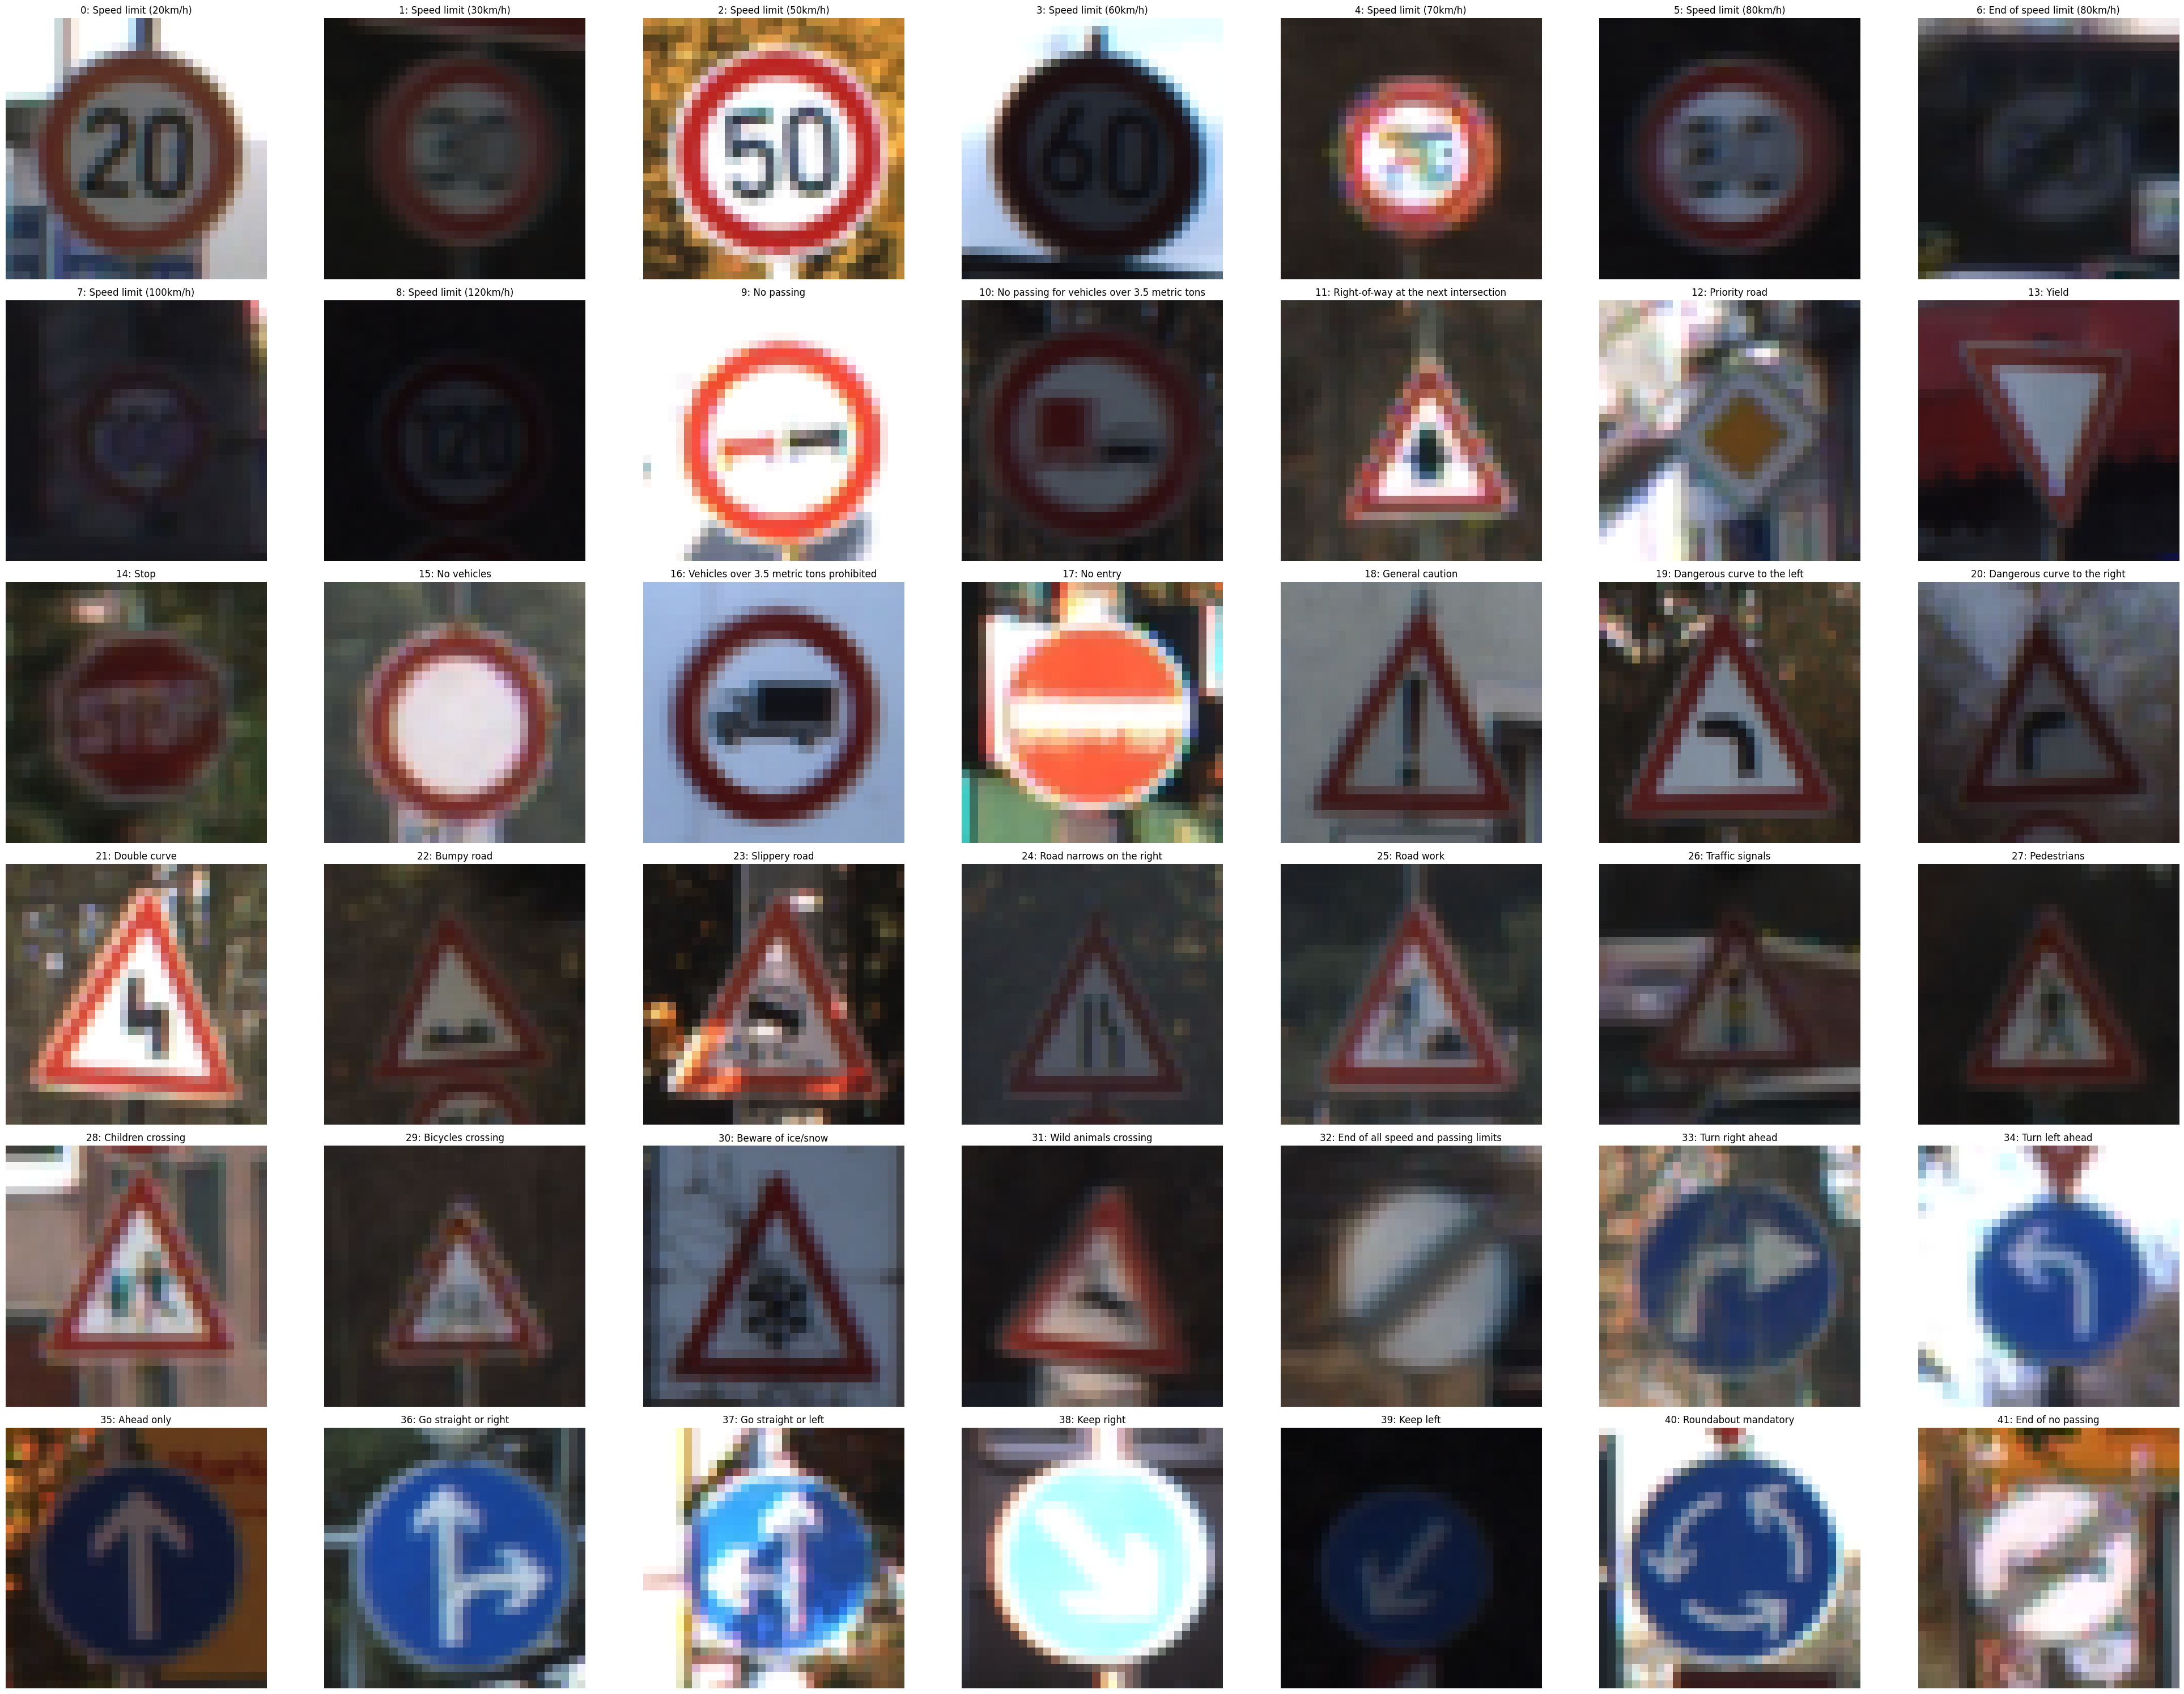

In [15]:
import random
import matplotlib.pyplot as plt


# Create subplots with 6 rows and 7 columns for 42 images (one from each class)
fig, axes = plt.subplots(6, 7, figsize=(40, 30))

# Loop through each class and plot one image from each class
for i in range(42):
    # Find one random image index for each class 'i'
    class_indices = [index for index, label in enumerate(y_train) if label == i]
    random_index = random.choice(class_indices)  # Randomly select one image from class 'i'

    # Plot the selected image
    axes[i // 7, i % 7].imshow(X_train[random_index])  # Plot the image
    axes[i // 7, i % 7].set_title(f"{i}: {traffic_signs[i]}")  # Title with class label
    axes[i // 7, i % 7].axis("off")  # Remove axis for better visualization

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()



#### <h4 style="color:blue; "> Data Preparation <h4>

In [16]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [17]:
# Convert from coloured image to gray ((32,32,3) to (32,32,1))
X_train_gray = np.mean(X_train, axis=3, keepdims=True)
X_valid_gray = np.mean(X_valid, axis=3, keepdims=True)
X_test_gray  = np.mean(X_test, axis=3, keepdims=True)


In [18]:
# X_train

In [19]:
# X_train_gray

In [20]:
X_train_gray.shape,X_valid_gray.shape,X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [21]:
# Normalizing the data ( 0,255) to  (-1,1)
X_train_gray = (X_train_gray-128)/128
X_valid_gray = (X_valid_gray-128)/128
X_test_gray  = (X_test_gray-128)/128


In [22]:
# X_train_gray

In [23]:
X_train_gray.shape,X_valid_gray.shape,X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

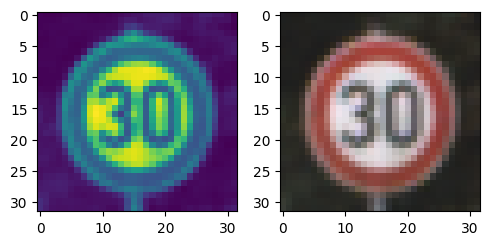

In [24]:

# Create Sub plots
fig,axes=plt.subplots(1,2,figsize=(5,5))

# Plot gray vs coloured images
axes[0].imshow(X_valid_gray[500])
axes[1].imshow(X_valid[500])
plt.tight_layout()


We can see from the above images that the gray scale does retain the important features

#### <h4 style="color:blue; "> Model building <h4>

The model consists of the following layers:

- **STEP 1**: `THE FIRST CONVOLUTIONAL LAYER #1`
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- **STEP 2**: `THE SECOND CONVOLUTIONAL LAYER #2`
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- **STEP 3**: `FLATTENING THE NETWORK`
    - Flatten the network with Input = 5x5x16 and Output = 400

- **STEP 4**: `FULLY CONNECTED LAYER`
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- **STEP 5**: `ANOTHER FULLY CONNECTED LAYER`
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- **STEP 6**: `FULLY CONNECTED LAYER`
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [25]:
from tensorflow.keras import datasets,layers,models

LeNet=models.Sequential()

# Adding 1st Conv and 1st Pooling
LeNet.add(layers.Conv2D(6,(5,5),activation="relu",input_shape=(32,32,1)))
LeNet.add(layers.AveragePooling2D(pool_size=(2,2)))

# Adding 2nd Conv and 2nd Pooling
LeNet.add(layers.Conv2D(16,(5,5),activation="relu"))
LeNet.add(layers.AveragePooling2D(pool_size=(2,2)))

# Flatten
LeNet.add(layers.Flatten())

# Add Fully connected Dense layer with 120 neurons
LeNet.add(layers.Dense(units=120,activation="relu"))

# Add 2nd Fully connected Dense layer with 84 neurons
LeNet.add(layers.Dense(units=84,activation="relu"))

# Add output layer with 43 neurons
LeNet.add(layers.Dense(units=43,activation="softmax"))




In [26]:
LeNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,511 (252.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.001)

In [28]:
LeNet.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

In [30]:
history=LeNet.fit(X_train_gray,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(X_valid_gray,y_valid),callbacks=[early_stop])

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1082 - loss: 3.4526 - val_accuracy: 0.3351 - val_loss: 2.5446
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4691 - loss: 1.9643 - val_accuracy: 0.5868 - val_loss: 1.4311
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7019 - loss: 1.0426 - val_accuracy: 0.7066 - val_loss: 1.0316
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8010 - loss: 0.6958 - val_accuracy: 0.7644 - val_loss: 0.8579
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8525 - loss: 0.5445 - val_accuracy: 0.7891 - val_loss: 0.7608
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8830 - loss: 0.4430 - val_accuracy: 0.8166 - val_loss: 0.6792
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8995 - loss: 0.3808 - val_accuracy: 0.8175 - val_loss: 0.6681
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9150 - loss: 0.3405 - val_accuracy: 0.8252 - v

In [31]:
loss,accuracy=LeNet.evaluate(X_test_gray,y_test)
loss,accuracy

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.8492


(0.8755861520767212, 0.8474267721176147)

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, ' Training Accuracy vs Validation Accuracy')

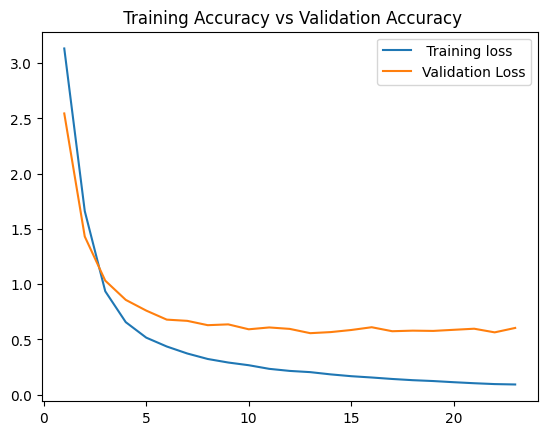

In [33]:
# plot accuracy vs validation accuracy
epochs=range(1,len(history.history["accuracy"])+1)
plt.plot(epochs,history.history['loss'],label=" Training loss")

plt.plot(epochs,history.history[ 'val_loss'],label="Validation Loss")
plt.legend()
plt.title(" Training Accuracy vs Validation Accuracy")

#### <h4 style="color:blue; "> Prediction <h4>

In [34]:
# Predicted classes
pred=LeNet.predict(X_test_gray)


pred_classes = np.argmax(pred, axis=1)
pred_classes

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
labels=[i for i in range(0,43)]
classes=[traffic_signs[i] for i in labels]
classes

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

In [36]:
cm=confusion_matrix(y_test,pred_classes)
print(cm)

[[ 23  36   0 ...   0   0   0]
 [  5 651  48 ...   0   0   0]
 [  0  54 649 ...   0   0   0]
 ...
 [  0   1   1 ...  55   0   0]
 [  0   0   0 ...   0  37   1]
 [  0   0   0 ...   0   9  78]]


<Axes: >

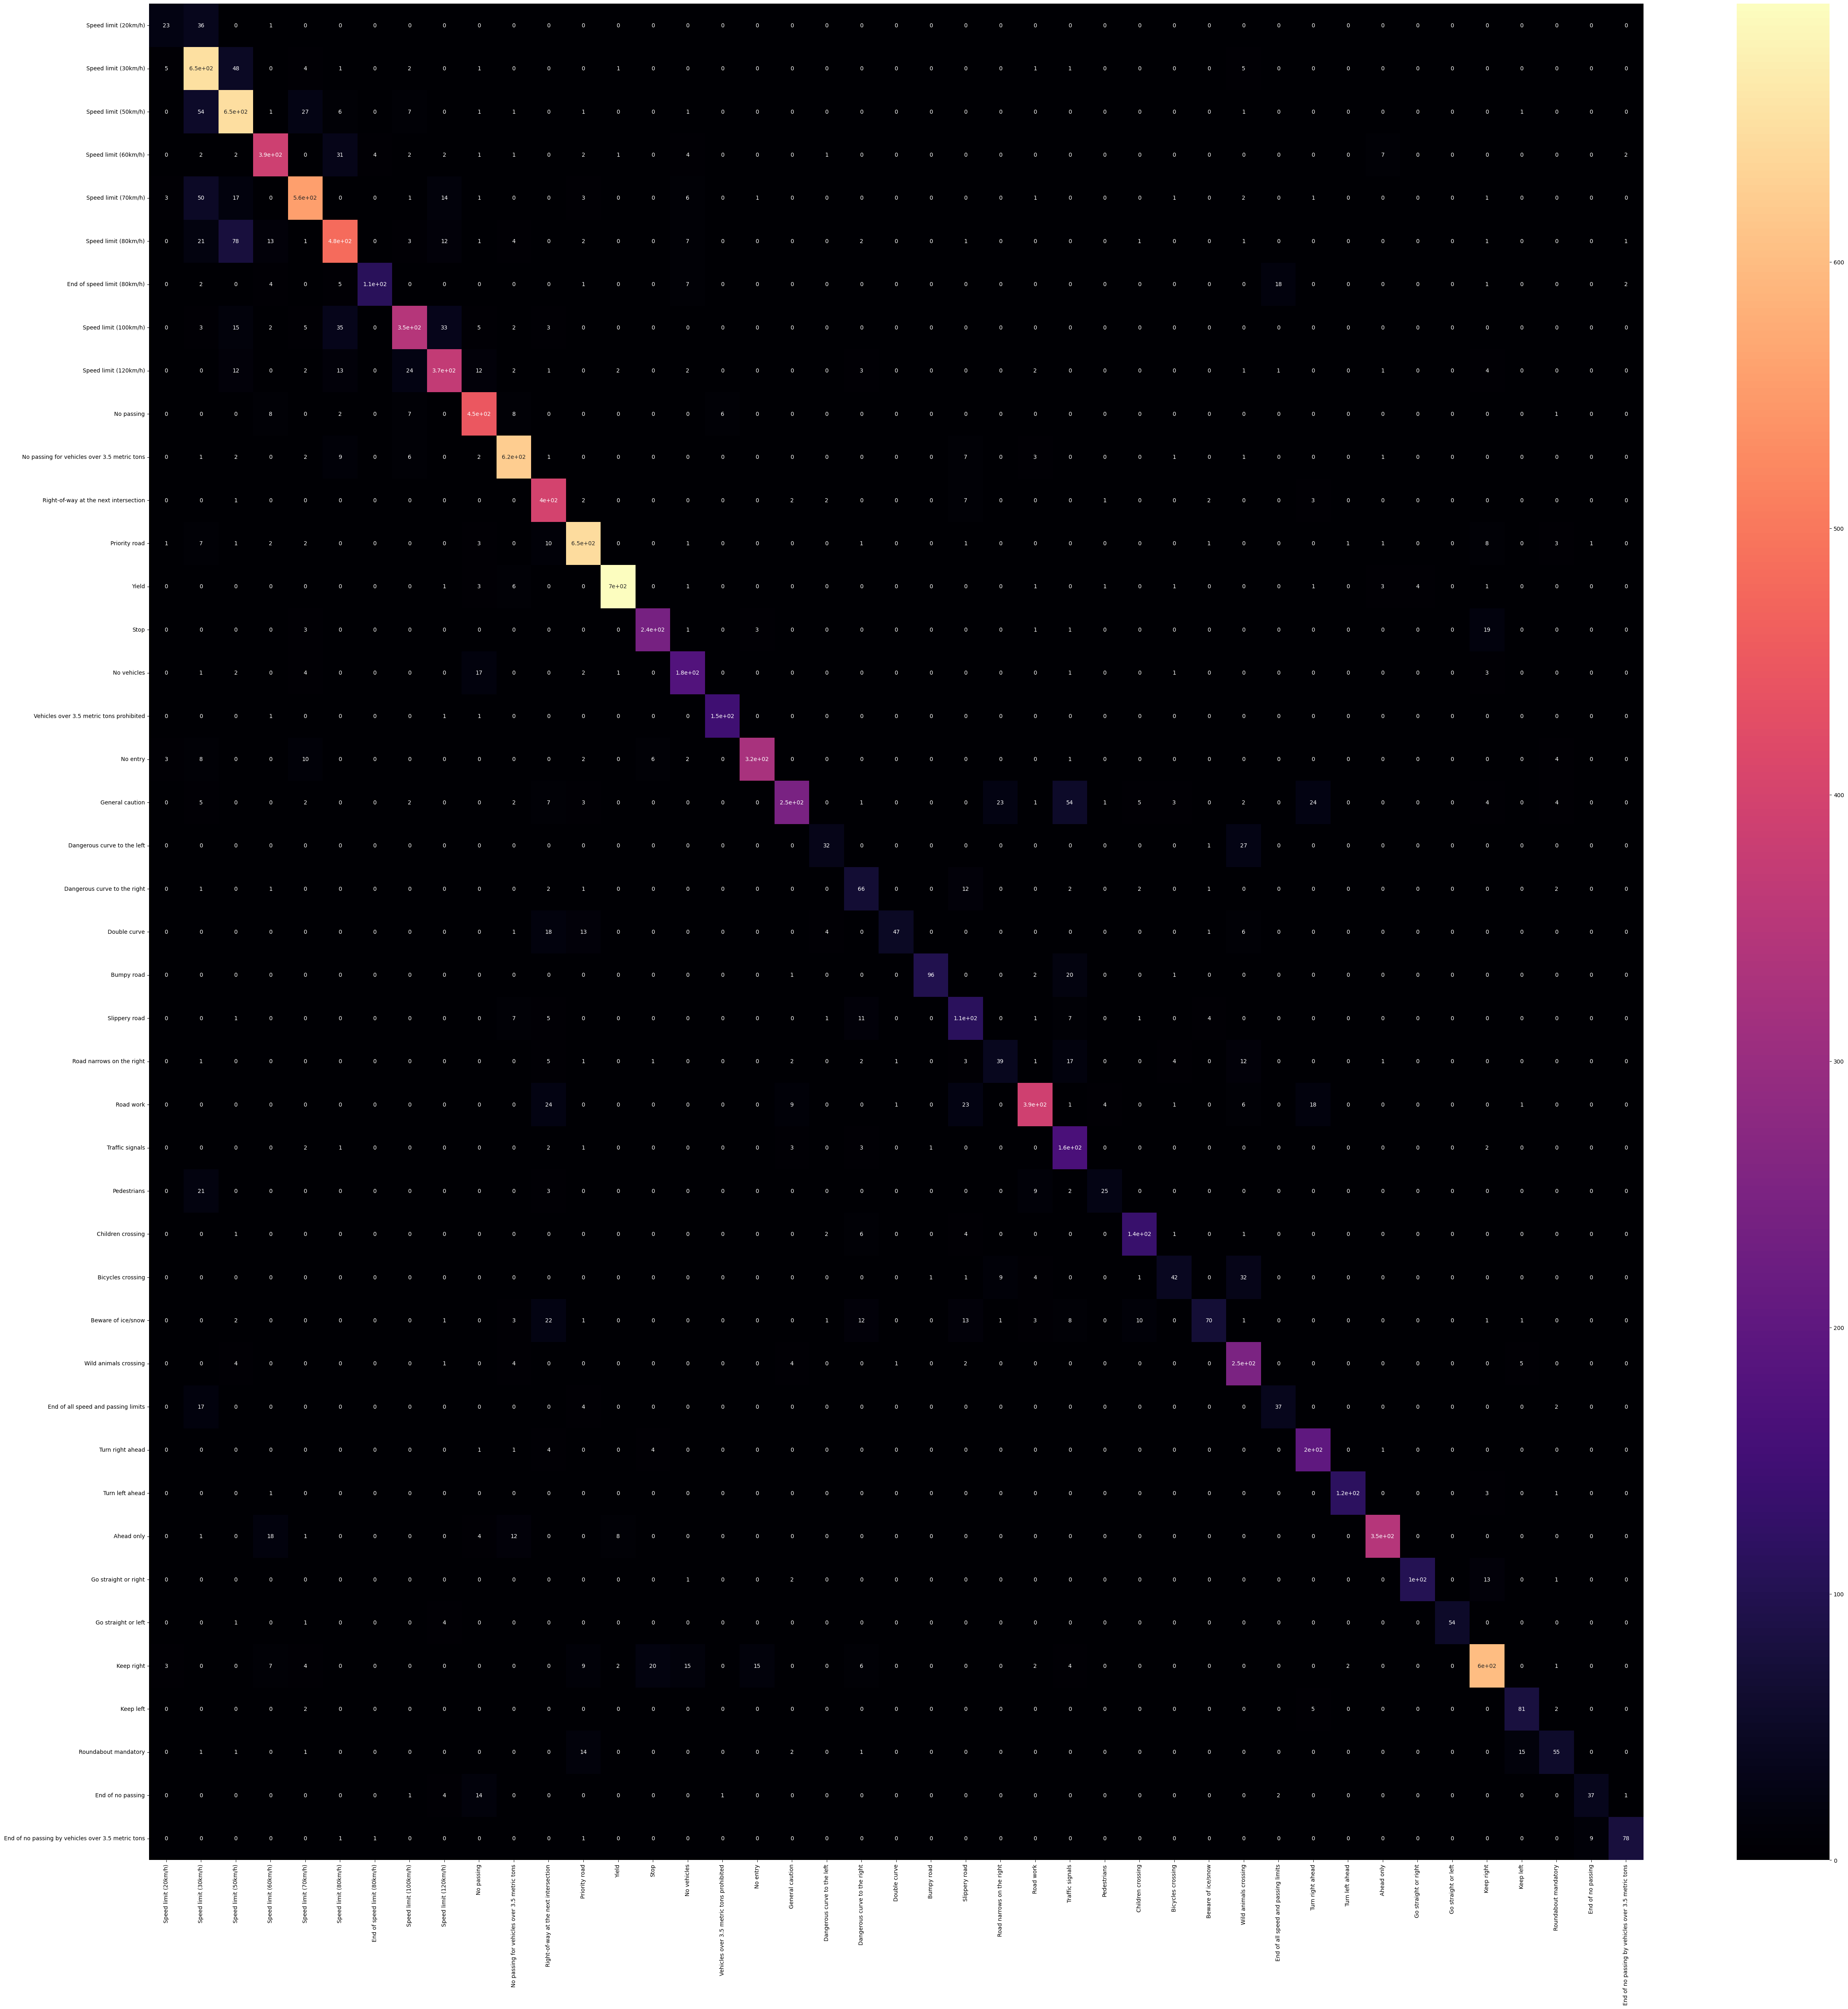

In [37]:
plt.figure(figsize=(60,60))
sns.heatmap(cm,xticklabels=classes,yticklabels=classes,cmap="magma",annot=True)

In [38]:
print(classification_report(pred_classes,y_test,target_names=classes))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.38      0.61      0.47        38
                              Speed limit (30km/h)       0.90      0.74      0.81       883
                              Speed limit (50km/h)       0.87      0.78      0.82       837
                              Speed limit (60km/h)       0.86      0.87      0.87       447
                              Speed limit (70km/h)       0.85      0.88      0.86       631
                              Speed limit (80km/h)       0.76      0.82      0.79       585
                       End of speed limit (80km/h)       0.73      0.96      0.83       115
                             Speed limit (100km/h)       0.77      0.86      0.81       402
                             Speed limit (120km/h)       0.82      0.83      0.83       441
                                        No passing       0.93      0.87      0.

**The accuracy is 86% and it can be improved by image augumentation**

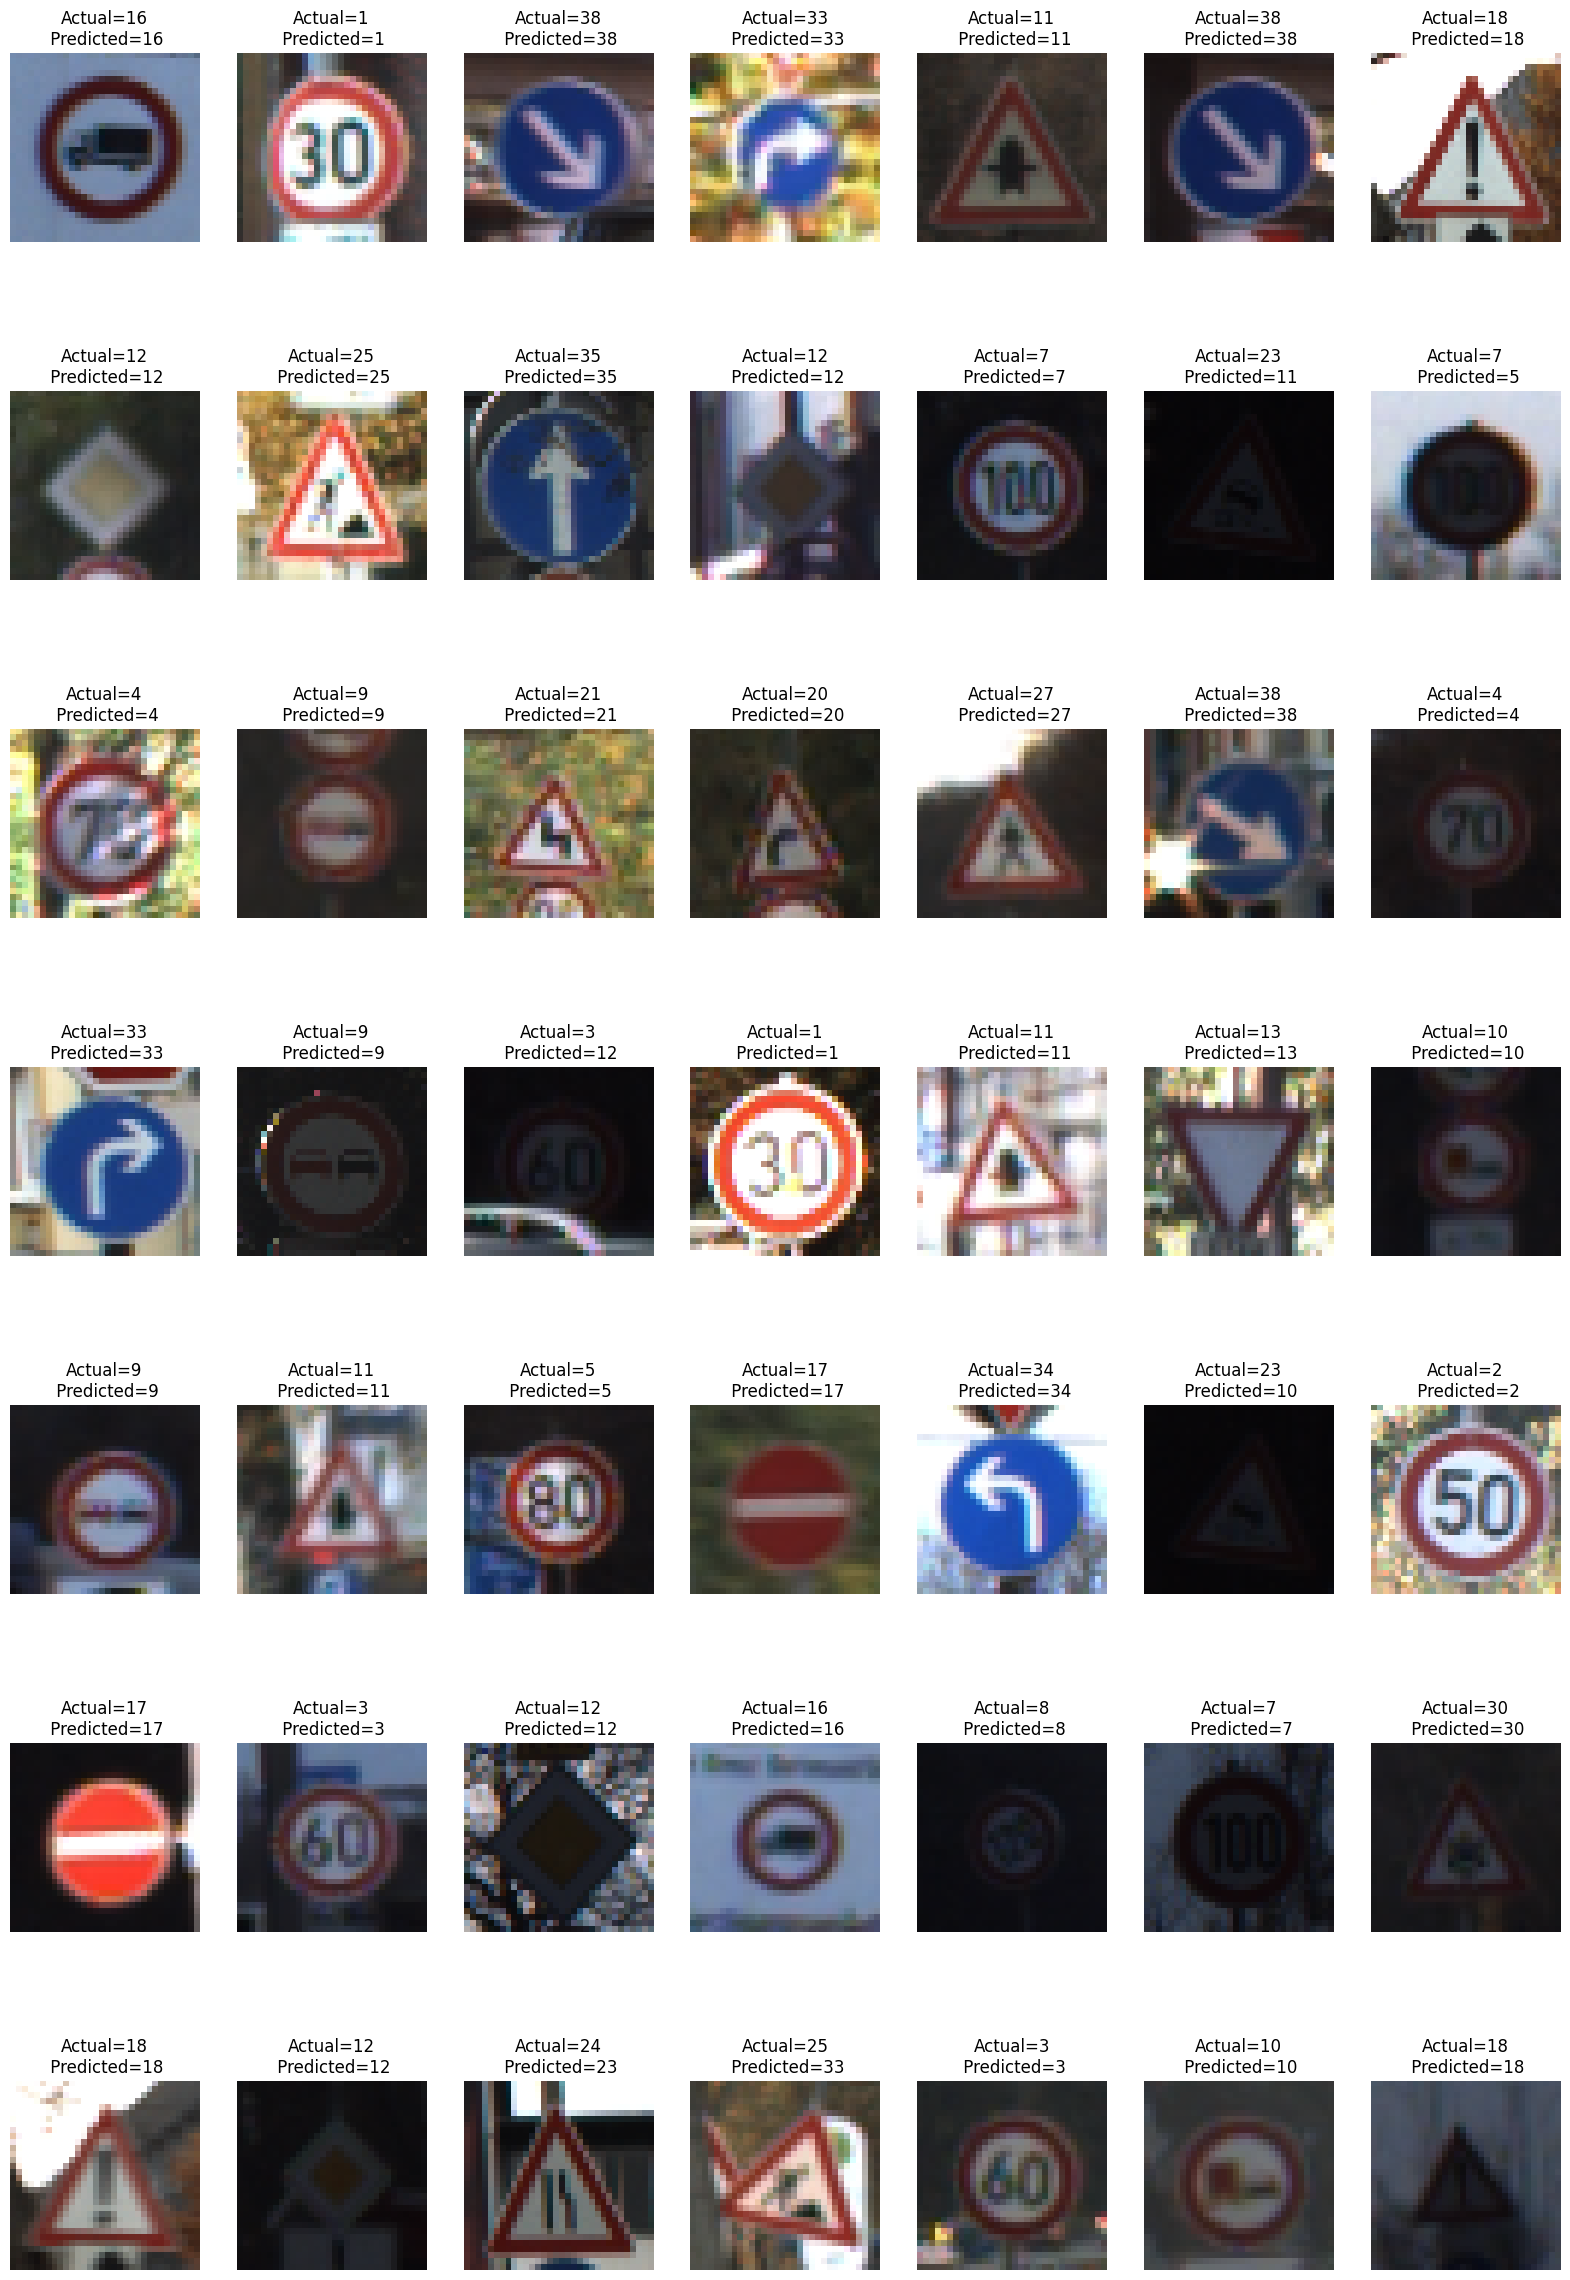

In [39]:
r=7
c=7

fig,axes=plt.subplots(r,c,figsize=(20,30))

for i in range(r * c):
    axes[i//7,i%7].imshow(X_test[i])
    axes[i//7,i%7].set_title(f"Actual={y_test[i]}\n Predicted={pred_classes[i]}")
    axes[i//7,i%7].axis("off")


#### <h4 style="color:blue; ">Using Image Augumentation<h4>

**Data augmentation** is a technique used to increase the diversity of data without actually collecting new data. It involves creating modified versions of the original data by applying various transformations. This is particularly useful in machine learning, especially in tasks like image classification, natural language processing, or speech recognition, where having more data can improve model performance and generalization.

In image processing, data augmentation techniques might include:
- **Rotation**: Rotating images by a certain angle.
- **Flipping**: Horizontal or vertical flipping of images.
- **Cropping**: Randomly cropping sections of the image.
- **Scaling**: Zooming in or out of the image.
- **Translation**: Shifting the image in different directions.
- **Color Jittering**: Adjusting brightness, contrast, or saturation.

In text data, data augmentation might involve:
- **Synonym Replacement**: Replacing words with their synonyms.
- **Random Insertion**: Inserting random words into the text.
- **Back Translation**: Translating the text to another language and then translating it back to the original language.

The goal of data augmentation is to improve the robustness of machine learning models by exposing them to a wider variety of data scenarios.


In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rotation_range=30,           # Rotate images up to 30 degrees
    width_shift_range=0.05,       # Shift horizontally by up to 5%
    height_shift_range=0.05,      # Shift vertically by up to 5%
    shear_range=0.15,            # Shear transformation
    zoom_range=0.05,              # Zoom in/out by 5%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill in missing pixels
)

In [64]:
# Number of augmented samples to generate per image
augment_factor = 1  # 

# Storage for augmented images and labels
augmented_images = []
augmented_labels = []

In [65]:
# Augment each image
for i in range(X_train_gray.shape[0]):
    img = np.expand_dims(X_train_gray[i], 0)  # Expand dims to match (1, 32, 32, 1)
    label = y_train[i]
    
    # Generate augmented images
    aug_iter = datagen.flow(img, batch_size=1)
    for _ in range(augment_factor):
        aug_img = next(aug_iter)[0]  # Get the next augmented image
        augmented_images.append(aug_img)
        augmented_labels.append(label)

# Convert to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

In [66]:
X_train_gray.shape,y_train.shape

((34799, 32, 32, 1), (34799,))

In [67]:
augmented_images.shape # odubled the dataset by 1 as(augement _factor is given 1 by us)

(34799, 32, 32, 1)

In [68]:
# Combine original and augmented data (optional)
x_augmented = np.concatenate((X_train_gray, augmented_images), axis=0)
y_augmented = np.concatenate((y_train, augmented_labels), axis=0)

In [69]:
x_augmented.shape,y_augmented.shape
# we have doubled the data set thats been given original
# lets train lnn on this

((69598, 32, 32, 1), (69598,))

In [70]:
# Cerating a cnn model
from tensorflow.keras import datasets, layers, models

LeNet_augmented = models.Sequential()

# Adding 1st Conv and 1st Pooling
LeNet_augmented.add(layers.Conv2D(6, (5, 5), activation="relu", input_shape=(32, 32, 1)))
LeNet_augmented.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Adding 2nd Conv and 2nd Pooling
LeNet_augmented.add(layers.Conv2D(16, (5, 5), activation="relu"))
LeNet_augmented.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten
LeNet_augmented.add(layers.Flatten())

# Add Fully connected Dense layer with 120 neurons
LeNet_augmented.add(layers.Dense(units=120, activation="relu"))

# Add 2nd Fully connected Dense layer with 84 neurons
LeNet_augmented.add(layers.Dense(units=84, activation="relu"))

# Add output layer with 43 neurons
LeNet_augmented.add(layers.Dense(units=43, activation="softmax"))


In [71]:
LeNet_augmented.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,511 (252.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
from tensorflow.keras.optimizers import Adam
optimizer1=Adam(learning_rate=0.001)

In [73]:
LeNet_augmented.compile(optimizer=optimizer1,loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [74]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop1=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [75]:
history1=LeNet_augmented.fit(x_augmented,y_augmented,batch_size=500,epochs=50,verbose=1,validation_data=(X_valid_gray,y_valid),callbacks=[early_stop1])

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1460 - loss: 3.2529 - val_accuracy: 0.4195 - val_loss: 2.0367
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4891 - loss: 1.7774 - val_accuracy: 0.5957 - val_loss: 1.3909
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5989 - loss: 1.3743 - val_accuracy: 0.6728 - val_loss: 1.0945
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6684 - loss: 1.1474 - val_accuracy: 0.7027 - val_loss: 0.9875
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7152 - loss: 0.9833 - val_accuracy: 0.7261 - val_loss: 0.9465
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7480 - loss: 0.8647 - val_accuracy: 0.7578 - val_loss: 0.8387
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7770 - loss: 0.7701 - val_accuracy: 0.7619 - val_loss: 0.7887
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7989 - loss: 0.6900 - val_accu

Text(0.5, 1.0, ' Training Accuracy vs Validation Accuracy')

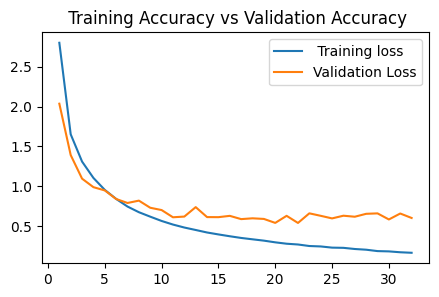

In [78]:
# plot accuracy vs validation accuracy
plt.figure(figsize=(5,3))
epochs=range(1,len(history1.history["accuracy"])+1)
plt.plot(epochs,history1.history['loss'],label=" Training loss")

plt.plot(epochs,history1.history[ 'val_loss'],label="Validation Loss")
plt.legend()
plt.title(" Training Accuracy vs Validation Accuracy")

In [79]:
loss,accuracy=LeNet_augmented.evaluate(X_test_gray,y_test)
loss,accuracy

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8309 - loss: 0.7993


(0.8086413741111755, 0.8321456909179688)

#### <h4 style="color:blue; "> Prediction <h4>

In [80]:
# Predicted classes
pred1=LeNet_augmented.predict(X_test_gray)


pred_classes1 = np.argmax(pred1, axis=1)
pred_classes1

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([16,  1, 38, ...,  7,  7, 10], dtype=int64)

In [81]:
cm1=confusion_matrix(y_test,pred_classes1)
print(cm1)

[[ 21  39   0 ...   0   0   0]
 [  3 640  55 ...   0   0   0]
 [  0  33 682 ...   0   0   0]
 ...
 [  0   1   0 ...  50   0   0]
 [  0   0   0 ...   0  34   0]
 [  0   0   0 ...   0   0  82]]


In [82]:
print(classification_report(pred_classes1,y_test,target_names=classes))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.35      0.46      0.40        46
                              Speed limit (30km/h)       0.89      0.80      0.84       800
                              Speed limit (50km/h)       0.91      0.74      0.81       925
                              Speed limit (60km/h)       0.66      0.90      0.76       330
                              Speed limit (70km/h)       0.86      0.86      0.86       656
                              Speed limit (80km/h)       0.71      0.70      0.71       638
                       End of speed limit (80km/h)       0.71      0.80      0.76       133
                             Speed limit (100km/h)       0.75      0.81      0.78       418
                             Speed limit (120km/h)       0.80      0.83      0.81       432
                                        No passing       0.86      0.94      0.

---
**Inference:**

---
The overall accuracy has not increased much even after doing the image augumentation .